In [1]:
# target: apps['Rating']
#feature: Category,Reviews,Sizes,Installs,Android Versions,Points
%matplotlib inline
import re
import csv
import pandas as pd
import numpy as np

reviews = pd.read_csv('.\googleplaystore_user_reviews.csv', engine = 'python')
apps = pd.read_csv('.\googleplaystore.csv', engine='python')

reviews = reviews.dropna()
reviews=reviews.reset_index(drop=True)

apps = apps.dropna()
apps=apps.reset_index(drop=True)

new_rate = []
for num in apps['Rating']:
    num *= 2
    new_rate.append(int(num))

apps['Rating'] = np.array(new_rate)


points = []
polar = reviews['Sentiment_Polarity'].values
subjectivity = reviews['Sentiment_Subjectivity'].values

for num in range(len(polar)):
    points.append(polar[num]*subjectivity[num])

points = np.array(points)
app_points = np.zeros(len(apps['Rating']))
app_points = pd.Series(app_points, index=apps.index)
points = pd.Series(points, index=reviews.index)
apps["Points"] = app_points.values
reviews["Points"] = points.values


# Count total review points
last_name = reviews['App'].values[0]
app_review_name = reviews['App'].values[0]
point_sum = 0

for index in range(len(reviews['App'].index)):
    if reviews['App'].values[index] == app_review_name:
        point_sum += reviews['Points'].values[index]
        last_name = app_review_name
    else:
        for idx in range(len(apps['App'].index)):
            if apps['App'].values[idx] == last_name:
                apps['Points'].values[idx] = point_sum
        point_sum = 0
        app_review_name = reviews['App'].values[index]

for idx in range(len(apps['App'].index)):
    if apps['App'].values[idx] == app_review_name:
        apps['Points'].values[idx] = point_sum
        
#print(apps['Points'].values[8])
#new_app = apps
#delete_app = apps[(apps['Size'] == 'Varies with device')].index
#apps = apps.drop(delete_app)
        

# Set installs number and size number to integer
install = []
sizes = []
sum_size = []

for idx in range(len(apps['Installs'].index)):
    ins = re.split('[+^+]', apps['Installs'].values[idx])[0]
    
    if(apps['Size'].values[idx] != 'Varies with device'):
        #print(apps['Size'].values[idx])
        size = re.split('[+M]', apps['Size'].values[idx])
        if len(size) == 2:
            size = float(size[0])*1024
        else:
            size = re.split('[+k]', apps['Size'].values[idx])
            if len(size) == 2:
                size = float(size[0])
        sum_size.append(size)
        
    else:
        size = 'Varies with devices'
        

    sizes.append(size)
    ins = ins.replace(",","")
    install.append(int(ins))

sizes = np.array(sizes)
install = np.array(install)
size = pd.Series(sizes, index=apps.index)
install = pd.Series(install, index=apps.index)
apps['Size'] = size.values
apps["Installs"] = install.values
#print(apps['Size'])
#print(apps['Installs'])

# Substitue the string "Varies with device"
sum_size = np.array(sum_size)
size_avg = np.mean(sum_size)
#print(size_avg)

new_size = []
for element in range(len(apps['Size'].index)):
    if (apps['Size'].values[element] == 'Varies with device' or apps['Size'].values[element] == 'Varies with devices'):
        new_size.append(size_avg)
    else:
        new_size.append(apps['Size'].values[element])
        
new_size = np.array(new_size)
new_size = pd.Series(new_size, index=apps.index)
apps['Size'] = new_size.values
print("HERE~~~~~~~")

sum_ver = []
for idx in range(len(apps['Android Ver'].index)):
    if (apps['Android Ver'].values[idx] != 'Varies with device'):
        ver = re.split("[A-Za-z. ]+", apps['Android Ver'].values[idx])
        version = 0.0
        if(len(ver) > 1 and ver[0].isdigit() and ver[1].isdigit()):
            #print(ver[0], ver[1])
             version += int(ver[0])+int(ver[1])*0.1
             apps['Android Ver'].values[idx] = version
             sum_ver.append(version)
           # apps['Android Ver'].values[idx] = version

sum_ver = np.array(sum_ver)
avg_ver = np.mean(sum_ver)
avg_ver = round(avg_ver,1)

new_ver = []
for idx in range(len(apps['Android Ver'].index)):
   if (apps['Android Ver'].values[idx] == 'Varies with device' or apps['Android Ver'].values[idx] == 'Varies with devices'):
       new_ver.append(avg_ver)
   else:
       new_ver.append(apps['Android Ver'].values[idx])
       
new_ver = np.array(new_ver)
new_ver = pd.Series(new_ver, index=apps.index)
apps['Android Ver'] = new_ver.values
print(len(apps))

HERE~~~~~~~
9360


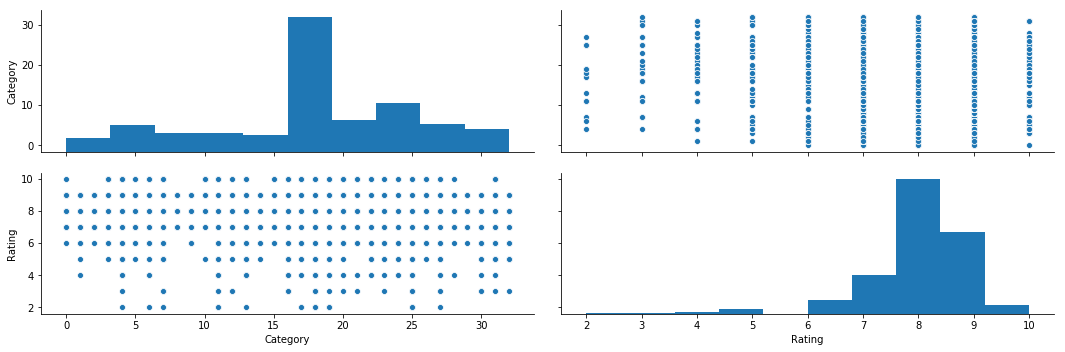

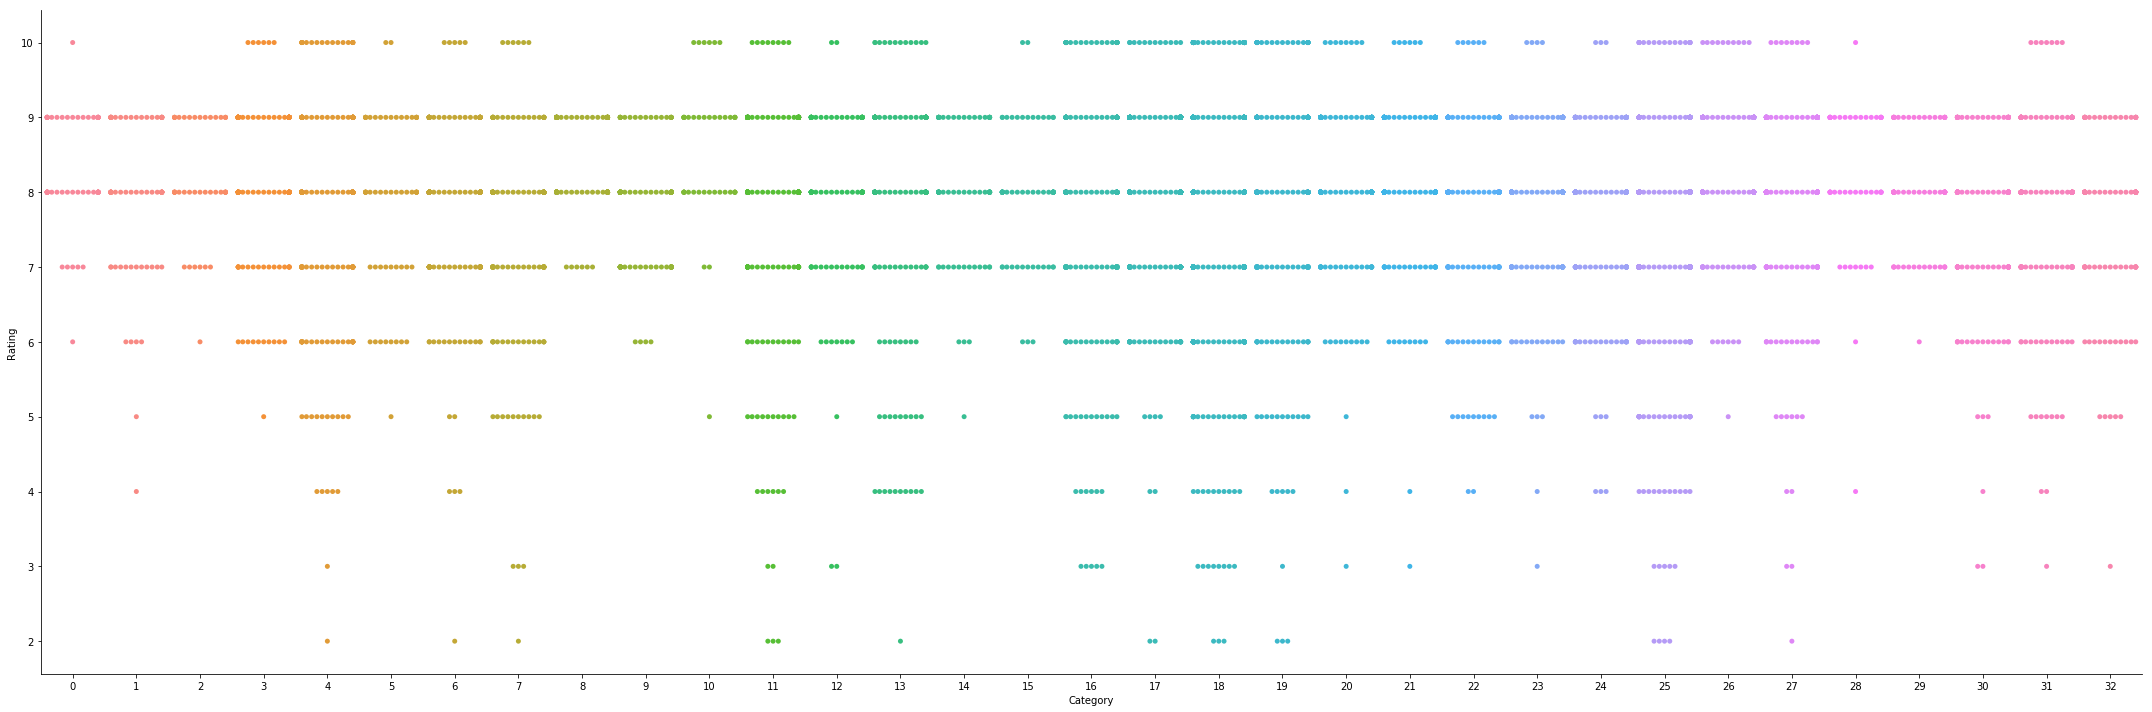

Correlation Matrix :


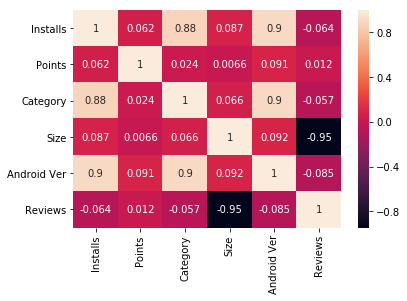

In [4]:
#Visualization
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
from sklearn import preprocessing

#Draw scatter matrix plot
draw_apps={
#     "Installs":np.log10(apps['Installs'].values),
#     "Points":apps['Points'].values,
#     "Size":np.log10(apps['Size'].values),
#     "Android Ver":apps['Android Ver'].values,
#     "Reviews":apps['Reviews'].values,
    "Category":apps['Category'].values,
    "Rating":apps['Rating'].values
}
draw_apps = pd.DataFrame(draw_apps)
# print(draw_apps)
sns.pairplot(draw_apps,palette="husl",aspect=3)
plt.show()
sns.catplot(x="Category", y="Rating", kind="swarm", data=draw_apps,height=10,aspect=3)
plt.show()

#Set category type to number
cnt=Counter(apps['Category'])
category=dict()
idx=0
for key in cnt:
    category[key]=idx
    idx+=1
apps['Category']=apps['Category'].map(category)
#Select feature and target
feature=np.transpose([np.log10(apps['Installs'].values),apps['Points'].values,apps['Category'].values,apps['Size'].values,apps['Android Ver'].values,apps['Reviews'].values])
feature_name=['Installs','Points','Category','Size','Android Ver','Reviews']
target=np.transpose(apps['Rating'])
feature_normalized = pd.DataFrame(preprocessing.normalize(feature))
corr = feature_normalized.corr()
print("Correlation Matrix :")
sns.heatmap(corr, 
            xticklabels=feature_name,
            yticklabels=feature_name,annot=True)

iteration =  1
iteration =  2
iteration =  3
iteration =  4
iteration =  5
iteration =  6
iteration =  7
iteration =  8
iteration =  9
iteration =  10
(9360,)
(9360,)
K-Fold Decision Tree Confusion Matrix :


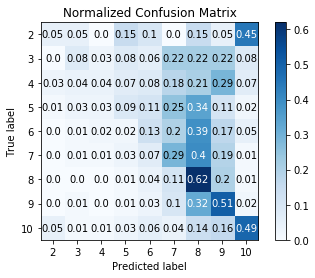

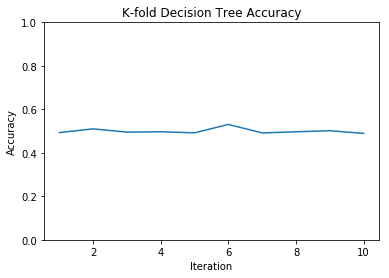

K-Fold Decision Tree Report :
              precision    recall  f1-score   support

           2       0.04      0.05      0.04        20
           3       0.06      0.08      0.07        36
           4       0.06      0.04      0.05        73
           5       0.09      0.09      0.09       158
           6       0.13      0.13      0.13       445
           7       0.28      0.29      0.28      1265
           8       0.62      0.62      0.62      4409
           9       0.52      0.51      0.52      2680
          10       0.47      0.49      0.48       274

   micro avg       0.50      0.50      0.50      9360
   macro avg       0.25      0.26      0.25      9360
weighted avg       0.50      0.50      0.50      9360



In [30]:
#K-fold cross validation + decision tree
from sklearn.model_selection import StratifiedKFold,KFold,cross_val_predict,train_test_split
from sklearn.metrics import precision_recall_curve,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sn
import itertools
import scikitplot as skplt
import numpy as np

k_fold_tree = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
kf = StratifiedKFold(n_splits=10,shuffle=True)
i=0

k_fold_target_predict=[]
k_fold_target_actual=[]
k_fold_score=[]

all_feature_train, all_feature_test, all_label_train, all_label_test = train_test_split(feature,target, test_size=0.0)
k_fold_result = []
for j in range(10):
    k_fold_result.append(np.zeros(len(all_label_train.values)))

for train_index,test_index in kf.split(feature,target):
    print("iteration = ",i+1)
    k_fold_feature_train, k_fold_feature_test = feature[train_index], feature[test_index]
    k_fold_label_train,  k_fold_label_test = target[train_index], target[test_index]
    
    k_fold_tree.fit(k_fold_feature_train, k_fold_label_train)
    k_fold_tree_y_predict=k_fold_tree.predict(k_fold_feature_test)
    k_fold_target_predict.append(k_fold_tree_y_predict)
    k_fold_target_actual.append(k_fold_label_test)

    #result for decision tree
    scores=k_fold_tree.score(k_fold_feature_test,k_fold_label_test.values)
    k_fold_score.append(scores)
    
    #for random forest
    k_fold_result[i] = k_fold_tree.predict(all_feature_train)
    i+=1

#Processing 
k_fold_target_predict=np.array([np.array(xi) for xi in k_fold_target_predict])
k_fold_target_predict=k_fold_target_predict.flatten()
k_fold_target_predict=[y for x in k_fold_target_predict for y in x]
print(np.shape(k_fold_target_predict))
k_fold_target_actual=np.array([np.array(xi) for xi in k_fold_target_actual])
k_fold_target_actual=k_fold_target_actual.flatten()
k_fold_target_actual=[y for x in k_fold_target_actual for y in x]
print(np.shape(k_fold_target_actual))
#K-fold decision tree confusion matrix
print("K-Fold Decision Tree Confusion Matrix :")
skplt.metrics.plot_confusion_matrix(k_fold_target_actual,k_fold_target_predict, normalize=True)
plt.show()
#Total k-fold decision tree score
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.title("K-fold Decision Tree Accuracy")
plt.ylim(0,1.0)
plt.plot(range(1,11),k_fold_score)
plt.show()
#total k-fold decision tree classification report
print("K-Fold Decision Tree Report :")
# print(k_fold_target_predict)
# k_fold_target_predict=k_fold_target_predict.reshape(-1,1)
# print(np.shape(k_fold_target_predict))
# print(k_fold_target_predict)
print(classification_report(k_fold_target_actual,k_fold_target_predict))

In [31]:
#Draw decision tree by using graphviz(should use terminal to change into .png)
from sklearn.tree import export_graphviz
export_graphviz(k_fold_tree, out_file='tree2.dot', feature_names=['Installs','Points','Category','Size','Android Ver','Reviews'])

10 9360
K-Fold random forest auc : 94.90384615384615%
K-Fold Random Forest Confusion Matrix :


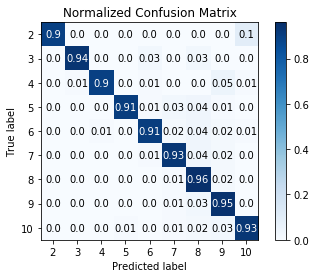

K-Fold Random Forest Report :
              precision    recall  f1-score   support

           2       0.86      0.90      0.88        20
           3       0.83      0.94      0.88        36
           4       0.92      0.90      0.91        73
           5       0.91      0.91      0.91       158
           6       0.90      0.91      0.91       445
           7       0.93      0.93      0.93      1265
           8       0.96      0.96      0.96      4409
           9       0.95      0.95      0.95      2680
          10       0.93      0.93      0.93       274

   micro avg       0.95      0.95      0.95      9360
   macro avg       0.91      0.93      0.92      9360
weighted avg       0.95      0.95      0.95      9360



In [32]:
#K-fold cross validation + random forest 
row,col=np.shape(k_fold_result)
k_fold_total_result = np.zeros(col)
print(row,col)

for i in range(col):
    for j in range(row):
        count=np.zeros(11)
        for k in range(2,len(count)):
            if k_fold_result[j][i]==k:
                count[k]+=1
    max_num = 0
    for x in range(2,11):
        if count[x] >= max_num:
            max_num = count[x]
            k_fold_total_result[i] = x

#check random forest accuracy
counter = 0
for index in range(len(k_fold_total_result)):
    if k_fold_total_result[index] == all_label_train.values[index]:
        counter+=1
        
accurancy = counter / len(k_fold_total_result)
print("K-Fold random forest auc : " +str(accurancy*100) + "%")

#k fold validation + decisiontree + confusion matrix
#confusion matrix,precision,recall
print("K-Fold Random Forest Confusion Matrix :")
skplt.metrics.plot_confusion_matrix(all_label_train.values,k_fold_total_result, normalize=True)
plt.show()
print("K-Fold Random Forest Report :")
print(classification_report(all_label_train.values,k_fold_total_result))

Resubstitution Decision Tree Score :
0.9996794871794872
Resubstitution Decision Tree Confusion Matrix :


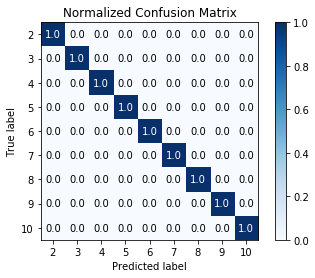

Resubstitution Decision Tree Report :
              precision    recall  f1-score   support

           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        36
           4       1.00      1.00      1.00        73
           5       1.00      1.00      1.00       158
           6       1.00      1.00      1.00       445
           7       1.00      1.00      1.00      1265
           8       1.00      1.00      1.00      4409
           9       1.00      1.00      1.00      2680
          10       1.00      1.00      1.00       274

   micro avg       1.00      1.00      1.00      9360
   macro avg       1.00      1.00      1.00      9360
weighted avg       1.00      1.00      1.00      9360



In [33]:
#resubstitution validation + decisiontree
total_train, total_test, result_train, result_test = train_test_split(feature,target, test_size=0.0)
resubstitution_decision_tree = DecisionTreeClassifier(criterion = 'entropy', random_state=0)

resubstitution_decision_tree.fit(total_train,result_train)
#print(resubstitution_decision_tree.predict(total_train))

#resubstitution validation score + decisiontree + confusion matrix
#score,confusion matrix,precision,recall
print("Resubstitution Decision Tree Score :")
print(resubstitution_decision_tree.score(total_train,result_train.values))

print("Resubstitution Decision Tree Confusion Matrix :")
skplt.metrics.plot_confusion_matrix(result_train.values,resubstitution_decision_tree.predict(total_train), normalize=True)
plt.show()

print("Resubstitution Decision Tree Report :")
print(classification_report(result_train.values,resubstitution_decision_tree.predict(total_train)))

In [34]:
#resubstitution validation + randomforest
#because select all,so shuffle set false
from sklearn.model_selection import train_test_split
                                                                                        #feature: Category,Reviews,Sizes(not done),Installs,Android Versions,Points
#Random forest(5 is all feature for testing)
feature1_train, feature1_test, label1_train, label1_test = train_test_split(np.transpose([apps["Category"].values,apps["Reviews"].values,apps["Size"].values,np.log10(apps["Installs"].values),apps["Android Ver"].values]), apps["Rating"].values, test_size=0.0,shuffle=False)
feature2_train, feature2_test, label2_train, label2_test = train_test_split(np.transpose([apps["Category"].values,apps["Reviews"].values,apps["Size"].values,np.log10(apps["Installs"].values),apps["Points"].values]), apps["Rating"].values, test_size=0.0,shuffle=False)
feature3_train, feature3_test, label3_train, label3_test = train_test_split(np.transpose([apps["Category"].values,apps["Reviews"].values,apps["Size"].values,apps["Points"].values,apps["Android Ver"].values]), apps["Rating"].values,test_size=0.0,shuffle=False)
feature4_train, feature4_test, label4_train, label4_test = train_test_split(np.transpose([apps["Category"].values,apps["Reviews"].values,apps["Points"].values,np.log10(apps["Installs"].values),apps["Android Ver"].values]), apps["Rating"].values, test_size=0.0,shuffle=False)
feature5_train, feature5_test, label5_train, label5_test = train_test_split(np.transpose([apps["Reviews"].values,apps["Points"].values,apps["Size"].values,np.log10(apps["Installs"].values),apps["Android Ver"].values]), apps["Rating"].values, test_size=0.0,shuffle=False)
feature6_train, feature6_test, label6_train, label6_test = train_test_split(np.transpose([apps["Category"].values,apps["Points"].values,apps["Size"].values,np.log10(apps["Installs"].values),apps["Android Ver"].values]), apps["Rating"].values, test_size=0.0,shuffle=False)
feature7_train, feature7_test, label7_train, label7_test = train_test_split(np.transpose([apps["Category"].values,apps["Points"].values,apps["Size"].values,np.log10(apps["Installs"].values),apps["Android Ver"].values,apps["Reviews"].values]), apps["Rating"], test_size=0.0,shuffle=False)

tree1_resubstitution = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
tree2_resubstitution = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
tree3_resubstitution = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
tree4_resubstitution = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
tree5_resubstitution = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
tree6_resubstitution = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
tree1_resubstitution.fit(feature1_train,label1_train)
tree2_resubstitution.fit(feature2_train,label2_train)
tree3_resubstitution.fit(feature3_train,label3_train)
tree4_resubstitution.fit(feature4_train,label4_train)
tree5_resubstitution.fit(feature5_train,label5_train)
tree6_resubstitution.fit(feature6_train,label6_train)
#Random forest cont.
A = feature1_train
# print("A=",A)
B = feature2_train
C = feature3_train
D = feature4_train
E = feature5_train
F = feature6_train

#print(tree1.predict(A))
#print(label5_train.values)
print("tree1 auc:  "+ str(tree1_resubstitution.score(A,label7_train.values)))

#print(tree2.predict(B))
#print(label5_train.values)
print("tree2 auc:  "+ str(tree2_resubstitution.score(B,label7_train.values)))

#print(tree3.predict(C))
#print(label5_train.values)
print("tree3 auc:  "+ str(tree3_resubstitution.score(C,label7_train.values)))

#print(tree4.predict(D))
#print(label5_test.values)
print("tree4 auc:  "+ str(tree4_resubstitution.score(D,label7_train.values)))

#print(tree4.predict(D))
#print(label5_test.values)
print("tree5 auc:  "+ str(tree5_resubstitution.score(E,label7_train.values)))
#print(tree4.predict(D))
#print(label5_test.values)
print("tree6 auc:  "+ str(tree6_resubstitution.score(F,label7_train.values)))



tree1 auc:  0.9996794871794872
tree2 auc:  0.9991452991452991
tree3 auc:  0.9990384615384615
tree4 auc:  0.9887820512820513
tree5 auc:  0.9980769230769231
tree6 auc:  0.9435897435897436


[ 8  7  9 ... 10  9  9]
Resubtitution Random Forest Accuracy : 99.96794871794872%
Resubstitution Random Forest Confusion Matrix :


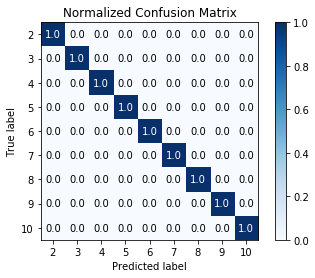

Resubstitution Random Forest Report :
              precision    recall  f1-score   support

           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        36
           4       1.00      1.00      1.00        73
           5       1.00      1.00      1.00       158
           6       1.00      1.00      1.00       445
           7       1.00      1.00      1.00      1265
           8       1.00      1.00      1.00      4409
           9       1.00      1.00      1.00      2680
          10       1.00      1.00      1.00       274

   micro avg       1.00      1.00      1.00      9360
   macro avg       1.00      1.00      1.00      9360
weighted avg       1.00      1.00      1.00      9360



In [35]:
from scipy import stats
fast_result=[tree1_resubstitution.predict(A),tree2_resubstitution.predict(B),tree3_resubstitution.predict(C),tree4_resubstitution.predict(D),tree5_resubstitution.predict(E),tree6_resubstitution.predict(F)]
fast_result=np.array(fast_result)
result=stats.mode(fast_result)[0][0]
# print(tree1_resubstitution.predict(A)[0:10])
# print(tree2_resubstitution.predict(B)[0:10])
# print(tree3_resubstitution.predict(C)[0:10])
# print(tree4_resubstitution.predict(D)[0:10])
# print(tree5_resubstitution.predict(E)[0:10])
# print(tree6_resubstitution.predict(F)[0:10])
print(result)

#check random forest accuracy
counter = 0
for index in range(len(result)):
    if result[index] == label7_train.values[index]:
        counter+=1

#resubstitution validation + forest + accuracy + confusion matrix
accurancy = counter / len(result)
print("Resubtitution Random Forest Accuracy : " +str(accurancy*100) + "%")

#confusion matrix,precision,recall
print("Resubstitution Random Forest Confusion Matrix :")
skplt.metrics.plot_confusion_matrix(label7_train.values,result, normalize=True)
plt.show()

print("Resubstitution Random Forest Report :")
print(classification_report(label7_train.values,result))

In [36]:
# #Random forest cont.(SO SLOW DON'T USE)
# result = np.zeros(len(label7_train.values))
# print(len(label7_train.values))
# for i in range(len(label7_train.values)):
#     print("Iteration = ",i)
#     count=np.zeros(11)
#     for k in range(2,len(count)):
#         if tree1_resubstitution.predict(A)[i] == k:
#             count[k]+=1
#         if tree2_resubstitution.predict(B)[i] == k:
#             count[k]+=1
#         if tree3_resubstitution.predict(C)[i] == k:
#             count[k]+=1
#         if tree4_resubstitution.predict(D)[i] == k:
#             count[k]+=1
#         if tree5_resubstitution.predict(E)[i] == k:
#             count[k]+=1
#         if tree6_resubstitution.predict(F)[i] == k:
#             count[k]+=1
    
#     max_num = 0
    
#     for j in range(2,11):
#         if count[j] >= max_num:
#             max_num = count[j]
#             result[i] = j
            
            
# #check random forest accuracy
# counter = 0
# for index in range(len(result)):
#     if result[index] == label7_train.values[index]:
#         counter+=1

# #resubstitution validation + forest + accuracy + confusion matrix
# accurancy = counter / len(result)
# print("Resubtitution Random Forest Accuracy : " +str(accurancy*100) + "%")

# #confusion matrix,precision,recall
# print("Resubstitution Random Forest Confusion Matrix :")
# skplt.metrics.plot_confusion_matrix(label7_train.values,result, normalize=True)
# plt.show()

# print("Resubstitution Random Forest Report :")
# print(classification_report(label7_train.values,result))